# High Level Design
## Forecasting model consists of following steps
*  Collecting and uploading the data
*  plotting the time-series data-
*  Exploratory Data Analysis
*  Make the time series data stationary
*  Plotting the correlation and auto correlation plots
*  Splitting the data into two parts as time series data cannot be splitted randomly
*  Building the model and validating it



In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")

In [3]:
#importing the required Libraries
data = pd.read_csv("Beds_Occupied (2).csv")
data.head(5)

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collection_date       359 non-null    object
 1   Total Inpatient Beds  359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [5]:
data.shape

(359, 2)

In [6]:
data.size

718

In [7]:
data['total_beds'] = 900
data

,collection_date,Total Inpatient Beds,total_beds
0,15-06-2020,293,900
1,16-06-2020,295,900
2,17-06-2020,290,900
3,18-06-2020,291,900
4,19-06-2020,288,900
...,...,...,...
354,11-06-2021,312,900
355,12-06-2021,212,900
356,13-06-2021,299,900
357,14-06-2021,202,900


In [8]:
d = data.collection_date.astype("datetime64[ns]")
d

0     2020-06-15
1     2020-06-16
2     2020-06-17
3     2020-06-18
4     2020-06-19
         ...    
354   2021-11-06
355   2021-12-06
356   2021-06-13
357   2021-06-14
358   2021-06-15
Name: collection_date, Length: 359, dtype: datetime64[ns]

In [9]:
data.describe()

,Total Inpatient Beds,total_beds
count,359.000000,359.0
mean,241.983287,900.0
std,28.936836,0.0
min,190.000000,900.0
25%,219.000000,900.0
50%,235.000000,900.0
75%,259.000000,900.0
max,341.000000,900.0


In [10]:
data['Available_beds'] = data['total_beds']-data['Total Inpatient Beds']
data

,collection_date,Total Inpatient Beds,total_beds,Available_beds
0,15-06-2020,293,900,607
1,16-06-2020,295,900,605
2,17-06-2020,290,900,610
3,18-06-2020,291,900,609
4,19-06-2020,288,900,612
...,...,...,...,...
354,11-06-2021,312,900,588
355,12-06-2021,212,900,688
356,13-06-2021,299,900,601
357,14-06-2021,202,900,698


In [11]:
data = data[['collection_date','Available_beds']]
data

,collection_date,Available_beds
0,15-06-2020,607
1,16-06-2020,605
2,17-06-2020,610
3,18-06-2020,609
4,19-06-2020,612
...,...,...
354,11-06-2021,588
355,12-06-2021,688
356,13-06-2021,601
357,14-06-2021,698


In [12]:
train_data = data[:186]
train_data

,collection_date,Available_beds
0,15-06-2020,607
1,16-06-2020,605
2,17-06-2020,610
3,18-06-2020,609
4,19-06-2020,612
...,...,...
181,17-12-2020,643
182,18-12-2020,655
183,19-12-2020,652
184,20-12-2020,688


In [13]:
train_data.shape

(186, 2)

In [14]:
test_data = data[186:]
test_data

,collection_date,Available_beds
186,22-12-2020,686
187,23-12-2020,645
188,24-12-2020,625
189,25-12-2020,648
190,26-12-2020,651
...,...,...
354,11-06-2021,588
355,12-06-2021,688
356,13-06-2021,601
357,14-06-2021,698


In [15]:
test_data.shape

(173, 2)

# Exploratory Data Analysis[EDA]:

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   collection_date  186 non-null    object
 1   Available_beds   186 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [17]:
train_data.describe()

,Available_beds
count,186.000000
mean,653.715054
std,30.248690
min,559.000000
25%,623.000000
50%,659.500000
75%,680.750000
max,707.000000


In [18]:
train_data.isnull().sum()

collection_date    0
Available_beds     0
dtype: int64

*  Here we can see that there are no null values

In [19]:
train_data[train_data.duplicated()].sum()

collection_date    0.0
Available_beds     0.0
dtype: float64

*  There are no duplicated values as well

*  Here the collection_date is in the format of object ,change that to Datetime64[ns] 


In [20]:
train_data['collection_date'] = pd.to_datetime(train_data['collection_date'],errors = 'coerce')

*  Here ,we have converted the collection_date to Datetime64[ns]

In [21]:
train_data.dtypes

collection_date    datetime64[ns]
Available_beds              int64
dtype: object

*  Now the collection_date is changes to Datetime64[ns]

In [22]:
train_data['collection_date'] = train_data['collection_date'].dt.strftime("%d-%m-%y")
train_data['collection_date']

0      15-06-20
1      16-06-20
2      17-06-20
3      18-06-20
4      19-06-20
         ...   
181    17-12-20
182    18-12-20
183    19-12-20
184    20-12-20
185    21-12-20
Name: collection_date, Length: 186, dtype: object

In [23]:
train_data['collection_date'] = train_data['collection_date'].astype("datetime64[ns]")
train_data['collection_date']

0     2020-06-15
1     2020-06-16
2     2020-06-17
3     2020-06-18
4     2020-06-19
         ...    
181   2020-12-17
182   2020-12-18
183   2020-12-19
184   2020-12-20
185   2020-12-21
Name: collection_date, Length: 186, dtype: datetime64[ns]

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   collection_date  186 non-null    datetime64[ns]
 1   Available_beds   186 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [25]:
print(train_data.min())
print(train_data.max())

collection_date    2020-06-15 00:00:00
Available_beds                     559
dtype: object
collection_date    2020-12-21 00:00:00
Available_beds                     707
dtype: object


*  559 and 707 are the minimum and maximum values of Dataset

## Visualization of the dataset

<AxesSubplot:>

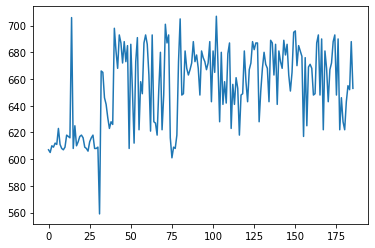

In [26]:
train_data.Available_beds.plot()

In [27]:
train_data['month'] = pd.DatetimeIndex(train_data['collection_date']).month
train_data

,collection_date,Available_beds,month
0,2020-06-15,607,6
1,2020-06-16,605,6
2,2020-06-17,610,6
3,2020-06-18,609,6
4,2020-06-19,612,6
...,...,...,...
181,2020-12-17,643,12
182,2020-12-18,655,12
183,2020-12-19,652,12
184,2020-12-20,688,12


<AxesSubplot:xlabel='month', ylabel='Available_beds'>

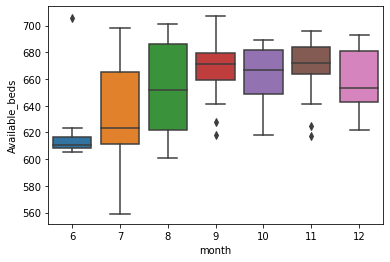

In [28]:
sns.boxplot(train_data['month'],train_data['Available_beds'])

<AxesSubplot:>

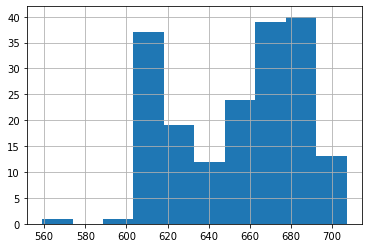

In [29]:
train_data['Available_beds'].hist()

<AxesSubplot:ylabel='Density'>

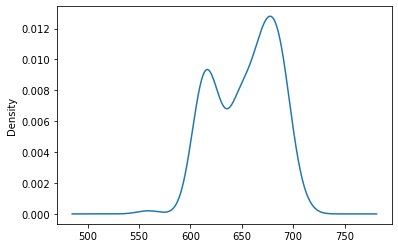

In [30]:
train_data['Available_beds'].plot(kind = 'kde')

*  Density Plot

In [31]:
#making the collection_data as index of the dataset

train_data.index = train_data['collection_date']
train_data = train_data[['Available_beds']]
train_data

,Available_beds
collection_date,
2020-06-15,607
2020-06-16,605
2020-06-17,610
2020-06-18,609
2020-06-19,612
...,...
2020-12-17,643
2020-12-18,655
2020-12-19,652


## Outlier detection using Isolation forest

In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
model = IsolationForest(contamination=0.02)
out = model.fit_predict(train_data)


In [34]:
 train_data['outlier_values'] = out


<AxesSubplot:xlabel='outlier_values', ylabel='count'>

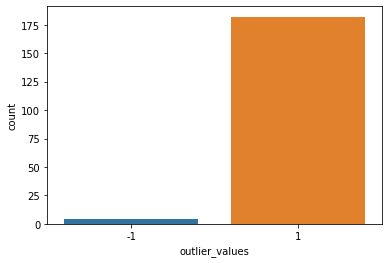

In [35]:
sns.countplot(train_data['outlier_values'])

In [36]:
train_data[train_data['outlier_values']==-1]

,Available_beds,outlier_values
collection_date,,
2020-07-16,559,-1
2020-08-29,601,-1
2020-09-03,705,-1
2020-09-25,707,-1


In [37]:
#Before imputation change these values to the nan values
train_data["Available_beds"]= train_data["Available_beds"].replace([601,559,705,707], np.nan)

In [38]:
m = (train_data['Available_beds']).mean()
m = int(m)
m

653

In [39]:
#imputing the outliers with the mean values

train_data["Available_beds"]= train_data["Available_beds"].fillna(m)
train_data= train_data[["Available_beds"]]

In [40]:
t=pd.DataFrame(train_data["Available_beds"])
t

,Available_beds
collection_date,
2020-06-15,607.0
2020-06-16,605.0
2020-06-17,610.0
2020-06-18,609.0
2020-06-19,612.0
...,...
2020-12-17,643.0
2020-12-18,655.0
2020-12-19,652.0


In [41]:
train_data

,Available_beds
collection_date,
2020-06-15,607.0
2020-06-16,605.0
2020-06-17,610.0
2020-06-18,609.0
2020-06-19,612.0
...,...
2020-12-17,643.0
2020-12-18,655.0
2020-12-19,652.0


In [44]:
Data = train_data.values
Data

array([[607.],
       [605.],
       [610.],
       [609.],
       [612.],
       [611.],
       [623.],
       [611.],
       [608.],
       [607.],
       [609.],
       [618.],
       [617.],
       [616.],
       [706.],
       [608.],
       [625.],
       [610.],
       [613.],
       [617.],
       [618.],
       [616.],
       [609.],
       [608.],
       [606.],
       [613.],
       [616.],
       [618.],
       [608.],
       [608.],
       [609.],
       [653.],
       [666.],
       [665.],
       [646.],
       [641.],
       [631.],
       [623.],
       [628.],
       [626.],
       [698.],
       [681.],
       [668.],
       [693.],
       [687.],
       [672.],
       [688.],
       [673.],
       [685.],
       [608.],
       [686.],
       [651.],
       [612.],
       [673.],
       [691.],
       [622.],
       [658.],
       [649.],
       [687.],
       [693.],
       [686.],
       [663.],
       [621.],
       [693.],
       [628.],
       [627.],
       [61

In [46]:
#test_data['collection_date'] = test_data['collection_date'].dt.strftime("%d-%m-%y")
test_data['collection_date'] = test_data['collection_date'].astype("datetime64[ns]")

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 186 to 358
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   collection_date  173 non-null    datetime64[ns]
 1   Available_beds   173 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [48]:
test_data['collection_date'] = test_data['collection_date'].dt.strftime('%d-%m-%y')

In [49]:
test_data['collection_date'] = test_data['collection_date'].astype('datetime64[ns]')

In [50]:
test_data.index = test_data['collection_date']

In [51]:
test_data = test_data[['Available_beds']]
test_data

,Available_beds
collection_date,
2020-12-22,686
2020-12-23,645
2020-12-24,625
2020-12-25,648
2020-12-26,651
...,...
2021-06-11,588
2021-06-12,688
2021-06-13,601
